# Day3: 資料視覺化

### 資料視覺化: 成為資料工程師(科學家)的第一步

本節將利用matplotlib把資料視覺化，以利進行資料的分析、理解

### 股票資訊分析
- 基本練習: 資料的操作
- 以折線圖(line chart)呈現資料

### 應用練習: 高雄市空氣品質監測數據
https://data.gov.tw/dataset/104783

- 取得資料
- 視覺化
- 找出超標的資料

### GCE: Google Compute Engine
- 開啟一雲端服務的機器
- 建立linux主機上的排程應用

----
## Day3-1 : 股價趨勢圖

## 讀取股價歷史資料

讀取股價歷史資料，並繪製線圖！

如果沒有 pandas data reader，記得要 pip install。

譬如在命令列中，使用：

    c:\> pip install pandas-datareader
    
或在 jupyter notebook中，使用:

    !pip install pandas-datareader


In [1]:
%matplotlib inline

In [2]:
import pandas_datareader.data as web
from datetime import datetime

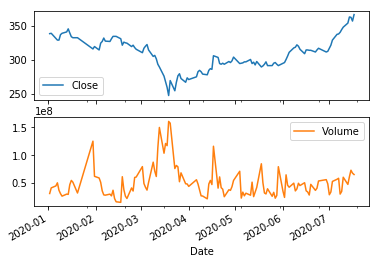

In [3]:
df = web.DataReader("2330.tw", 'yahoo', datetime(2020,1,1))
df[['Close', 'Volume']].plot(subplots=True);

- 回到我們最熟悉的list, dict

In [4]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,339.0,332.5,332.5,339.0,31754120.0,333.075775
2020-01-03,345.0,335.5,344.0,339.5,41811268.0,333.567047
2020-01-06,334.5,332.0,333.0,332.0,45343057.0,326.198120
2020-01-07,333.0,326.5,332.5,329.5,50879181.0,323.741791
2020-01-08,333.0,325.0,325.0,329.5,37567748.0,323.741791


In [5]:
df.index.tolist()

[Timestamp('2020-01-02 00:00:00'),
 Timestamp('2020-01-03 00:00:00'),
 Timestamp('2020-01-06 00:00:00'),
 Timestamp('2020-01-07 00:00:00'),
 Timestamp('2020-01-08 00:00:00'),
 Timestamp('2020-01-09 00:00:00'),
 Timestamp('2020-01-10 00:00:00'),
 Timestamp('2020-01-13 00:00:00'),
 Timestamp('2020-01-14 00:00:00'),
 Timestamp('2020-01-15 00:00:00'),
 Timestamp('2020-01-16 00:00:00'),
 Timestamp('2020-01-17 00:00:00'),
 Timestamp('2020-01-20 00:00:00'),
 Timestamp('2020-01-30 00:00:00'),
 Timestamp('2020-01-31 00:00:00'),
 Timestamp('2020-02-03 00:00:00'),
 Timestamp('2020-02-04 00:00:00'),
 Timestamp('2020-02-05 00:00:00'),
 Timestamp('2020-02-06 00:00:00'),
 Timestamp('2020-02-07 00:00:00'),
 Timestamp('2020-02-10 00:00:00'),
 Timestamp('2020-02-11 00:00:00'),
 Timestamp('2020-02-12 00:00:00'),
 Timestamp('2020-02-13 00:00:00'),
 Timestamp('2020-02-14 00:00:00'),
 Timestamp('2020-02-17 00:00:00'),
 Timestamp('2020-02-18 00:00:00'),
 Timestamp('2020-02-19 00:00:00'),
 Timestamp('2020-02-

In [6]:
stock_date = df.index.strftime("%Y-%m-%d").tolist()

In [13]:
stock_date

['2020-01-02',
 '2020-01-03',
 '2020-01-06',
 '2020-01-07',
 '2020-01-08',
 '2020-01-09',
 '2020-01-10',
 '2020-01-13',
 '2020-01-14',
 '2020-01-15',
 '2020-01-16',
 '2020-01-17',
 '2020-01-20',
 '2020-01-30',
 '2020-01-31',
 '2020-02-03',
 '2020-02-04',
 '2020-02-05',
 '2020-02-06',
 '2020-02-07',
 '2020-02-10',
 '2020-02-11',
 '2020-02-12',
 '2020-02-13',
 '2020-02-14',
 '2020-02-17',
 '2020-02-18',
 '2020-02-19',
 '2020-02-20',
 '2020-02-21',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-09',
 '2020-03-10',
 '2020-03-11',
 '2020-03-12',
 '2020-03-13',
 '2020-03-16',
 '2020-03-17',
 '2020-03-18',
 '2020-03-19',
 '2020-03-20',
 '2020-03-23',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-30',
 '2020-03-31',
 '2020-04-01',
 '2020-04-06',
 '2020-04-07',
 '2020-04-08',
 '2020-04-09',
 '2020-04-10',
 '2020-04-13',
 '2020-04-14',
 '2020-04-15',
 '2020-04-16',
 '2020-04-

In [7]:
stock_close = df['Close'].tolist()
stock_volume = df['Volume'].tolist()

In [8]:
type(stock_close)

list

In [9]:
type(stock_volume)

list

- 把資料存成csv，方便重覆使用

In [14]:
import csv

In [15]:
fn = 'stock_data_20200101-20200718.csv'
with open(fn, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['date', 'close', 'volume'])
    for i in range(len(stock_close)):
        writer.writerow([stock_date[i], stock_close[i], stock_volume[i]])

In [28]:
fn = 'stock_data_2.csv'
with open(fn, 'w', newline='\r') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['date', 'close', 'volume'])
    for i in range(len(stock_close)):
        writer.writerow([stock_date[i], stock_close[i], stock_volume[i]])

- 把csv讀出來使用

In [16]:
import csv

with open(fn, 'r') as csvfile:
    rows = csv.reader(csvfile)
    data_list2 = list(rows)

In [17]:
data_list2[:3]

[['date', 'close', 'volume'],
 ['2020-01-02', '339.0', '31754120.0'],
 ['2020-01-03', '339.5', '41811268.0']]

In [18]:
stock_close = []
stock_date = []
for item in data_list2[1:]:
    stock_close.append(float(item[1]))
    stock_date.append(item[0])

In [23]:
print(stock_close)

[339.0, 339.5, 332.0, 329.5, 329.5, 337.5, 339.5, 341.5, 346.0, 340.0, 334.5, 333.0, 333.0, 316.5, 320.0, 315.0, 325.0, 327.5, 332.5, 328.0, 327.5, 331.5, 335.0, 335.0, 335.0, 331.5, 322.0, 326.5, 325.5, 325.0, 320.0, 322.0, 318.5, 316.0, 311.0, 317.5, 320.5, 323.0, 315.0, 305.5, 307.0, 302.0, 294.0, 290.0, 276.5, 268.0, 260.0, 248.0, 270.0, 255.0, 267.5, 277.0, 280.0, 273.0, 267.5, 274.0, 271.5, 275.5, 283.0, 285.0, 283.0, 279.5, 278.5, 285.0, 287.5, 286.5, 306.5, 304.0, 295.0, 294.0, 295.5, 294.0, 298.0, 296.5, 299.0, 304.5, 295.0, 295.5, 296.0, 297.5, 297.5, 301.0, 295.0, 297.0, 293.0, 298.0, 290.0, 291.5, 294.0, 297.5, 292.0, 292.0, 295.5, 296.5, 294.0, 292.0, 295.5, 296.5, 301.0, 306.0, 311.5, 318.0, 319.0, 322.5, 320.5, 316.0, 309.5, 315.0, 315.0, 314.5, 314.5, 312.0, 315.0, 317.5, 312.0, 313.0, 317.5, 322.0, 329.5, 338.0, 338.5, 341.0, 345.0, 348.5, 354.5, 363.5, 363.0, 357.5, 367.0]


In [19]:
ll = []
print(ll)

[]


In [22]:
ll.append(33)
print(ll)

[11, 22, 33]


----
### 練習題

- 找出最高點

In [32]:
stock_close[0]

339.0

In [34]:
stock_close[2]

332.0

In [29]:
# 請填入程式
close_max = 0
date_max = None
for i in range(len(stock_close)):
    if close_max < stock_close[i]:
        close_max = stock_close[i]
        date_max = stock_date[i]
print(date_max, '==> ', close_max)

2020-07-17 ==>  367.0


- 找出最低點

In [35]:
close_min = stock_close[0]
date_min = stock_date[0]
for i in range(len(stock_close)):
    if close_min > stock_close[i]:
        close_min = stock_close[i]
        date_min = stock_date[i]
print(date_min, '--> ', close_min)

2020-03-19 -->  248.0


- 找出每個月的最高點 or 最低點

In [36]:
# 取出月份
stock_date[0][5:7]

'01'

In [62]:
# 請填入程式
for m in range(1, 8):
    #print(m)
    close_max = 0
    date_max = None
    close_min = 10000
    date_min = None
    for i in range(len(stock_close)):
        #if m == int(stock_date[i][5:7]):
        str_m = '%02d' %(m)
        if str_m == stock_date[i][5:7]:
            if close_max < stock_close[i]:
                close_max = stock_close[i]
                date_max = stock_date[i]
            if close_min > stock_close[i]:
                close_min = stock_close[i]
                date_min = stock_date[i]
    print('[%d] max: %s @ %s' %(m, close_max, date_max))
    print('[%d] min: %s @ %s' %(m, close_min, date_min))


[1] max: 346.0 @ 2020-01-14
[1] min: 316.5 @ 2020-01-30
[2] max: 335.0 @ 2020-02-12
[2] min: 315.0 @ 2020-02-03
[3] max: 323.0 @ 2020-03-05
[3] min: 248.0 @ 2020-03-19
[4] max: 306.5 @ 2020-04-17
[4] min: 271.5 @ 2020-04-01
[5] max: 301.0 @ 2020-05-11
[5] min: 290.0 @ 2020-05-18
[6] max: 322.5 @ 2020-06-10
[6] min: 295.5 @ 2020-06-01
[7] max: 367.0 @ 2020-07-17
[7] min: 317.5 @ 2020-07-01


- 重新再用基本工具繪趨勢圖

In [43]:
%matplotlib inline

Text(0,0.5,'close')

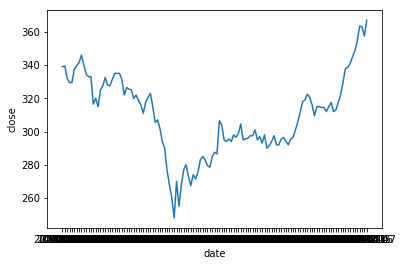

In [44]:
import matplotlib.pyplot as plt

plt.plot(stock_date, stock_close)
plt.xlabel('date')
plt.ylabel('close')


Text(0,0.5,'close')

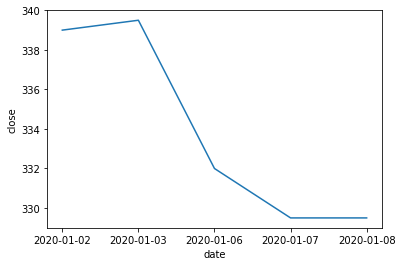

In [46]:
import matplotlib.pyplot as plt

plt.plot(stock_date[0:5], stock_close[0:5])
plt.xlabel('date')
plt.ylabel('close')


In [ ]:
stock_date[0::10]

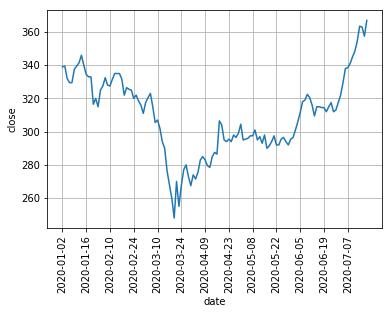

In [47]:
import matplotlib.pyplot as plt

plt.plot(stock_date, stock_close)
plt.xlabel('date')
plt.ylabel('close')
plt.xticks(stock_date[0::10], rotation=90)
plt.grid()

- 計算移動平均值，再把趨勢圖畫出來

In [ ]:
# 請填入程式



- 用line把每天的報價送出來

In [57]:
len(stock_date)

129

In [58]:
stock_date[-2:]

['2020-07-16', '2020-07-17']

In [59]:
stock_date[-1:]

['2020-07-17']

In [61]:
stock_date[-5]

'2020-07-13'

In [53]:
import requests

token = 'xKkAS3hOquwluB4ZKfCfEAEui8HpGfwmurvm2tc8J31' #Python課程
url = "https://notify-api.line.me/api/notify"  # --> 不支援http, 只能用https
headers = {"Authorization" : "Bearer "+ token}

title = '2330報價'
message =  '[%s] %s: %s' %(title, stock_date[-1], stock_close[-1])
payload = {"message" :  message}

r = requests.post(url ,headers = headers ,params=payload)
r

<Response [200]>

- 用line把近10天的價格趨勢圖送出來

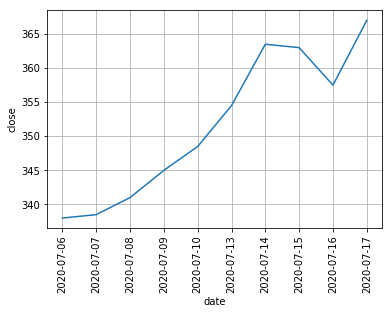

In [70]:
# 請填入程式
# 提示 plt.savefig('image.png')
import matplotlib.pyplot as plt

plt.plot(stock_date[-10:], stock_close[-10:])
plt.xlabel('date')
plt.ylabel('close')
plt.xticks(stock_date[-10:], rotation=90)

plt.grid()
plt.savefig('image.png')

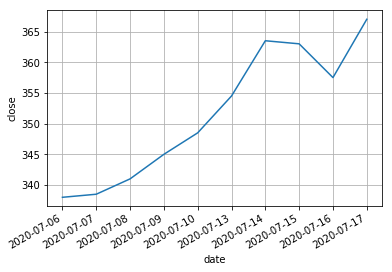

In [71]:
# 請填入程式
# 提示 plt.savefig('image.png')
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

plt.plot(stock_date[-10:], stock_close[-10:])
plt.xlabel('date')
plt.ylabel('close')
#plt.xticks(stock_date[-10:], rotation=90)

ax.set_xticklabels(stock_date[-10:])
fig.autofmt_xdate(rotation=30)

plt.grid()
plt.savefig('d:/image.png')

In [56]:
img = 'image.png'

title = '2330近10日趨勢圖'
message =  '[%s]' %(title)
payload = {"message" :  message}

files = {'imageFile': open(img, 'rb')}
r = requests.post(url, headers = headers, params = payload, files = files)
r

<Response [200]>

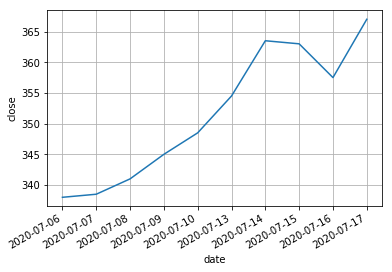

In [71]:
# 請填入程式
# 提示 plt.savefig('image.png')
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

plt.plot(stock_date[-10:], stock_close[-10:])
plt.xlabel('date')
plt.ylabel('close')
ax.set_xticklabels(stock_date[-10:])
fig.autofmt_xdate(rotation=30)
plt.grid()

img = 'image.png'
plt.savefig(img)

title = '2330近10日趨勢圖'
message =  '[%s]' %(title)
payload = {"message" :  message}
files = {'imageFile': open(img, 'rb')}
r = requests.post(url, headers = headers, params = payload, files = files)